In [1]:
import matplotlib.pyplot as plt #图标细节的调试库
import seaborn as sns #图标整体的设计库
import pandas as pd
import matplotlib.ticker as mticker # 导入专门的刻度工具箱


#导入昨天的数据，ipynb没法直接调用其他ipynb文件的函数，作为一个单独的文件存在，所以要复制一下昨天的内容
df = pd.read_csv('netflix_titles.csv')

#按国家影片内容排序
country_counts = df.groupby('country')['show_id'].count().reset_index().sort_values(by='show_id', ascending=False)
country_counts.rename(columns={'show_id': 'content_count'}, inplace=True)

#按年份新内容增长排序
year_counts = df.groupby('release_year')['show_id'].count().reset_index()
year_counts.rename(columns={'show_id':'content_count'},inplace=True)

print('数据导入完毕！接下来我们开始画图！')

year_counts.tail(10)

数据导入完毕！接下来我们开始画图！


,release_year,content_count
64,2012,237
65,2013,288
66,2014,352
67,2015,560
68,2016,902
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953
73,2021,592


In [2]:
#学习使用 Python 中最主流的两个可视化库：Matplotlib 和 Seaborn。

#Matplotlib：是 Python 可视化的“奠基者”，功能非常强大，但代码有时会有点繁琐。你可以把它想象成手动的“画笔和颜料”。

#Seaborn：它是在 Matplotlib 的基础上封装的、更高级的工具库。它的代码更简洁、图形更美观，专门为统计图表而生。你可以把它想象成一套“高级绘图模板”。

#在工作中，我们通常会两者结合使用：用 Seaborn 快速画出漂亮的统计图，再用 Matplotlib 对图表的细节（比如标题、坐标轴）进行微调。

In [3]:
#制作报告和PPT：把图表直接插入你的分析报告或PPT中。

#构建数据看板 (Dashboard)：在公司的BI系统里，你看到的所有动态图表，其底层逻辑都和我们今天学习的一样。

#探索性数据分析 (EDA：Exploratory Data Analysis)：在分析初期，快速画图能帮你一眼看出数据的分布、趋势和异常值，比看数字快得多。

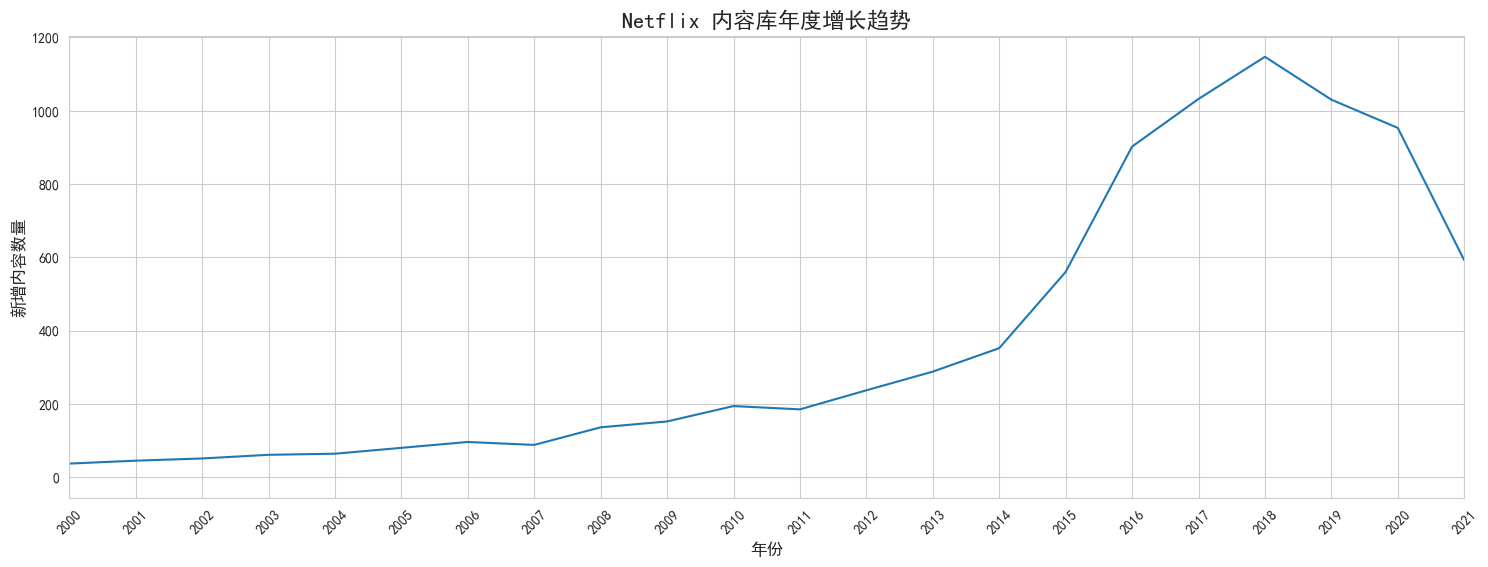

In [4]:
# 设置折线图（Linechart/lineplot）
# 设置图表的整体风格
sns.set_style("whitegrid")
# !!!sns的设置相当于一键换肤  所以一定要设置在设置字体之前
# whitegrid 是 Seaborn 提供的一个预设的图表风格模板，它的名字已经完美地描述了它的特点：“白色”+“网格”

#Seaborn 的“一键换肤”：当你调用 sns.set_style() 或 sns.set_theme() 这样的函数时，Seaborn 做的不仅仅是“添加一个白色网格”。
#它实际上是拿出了一套自己预设好的完整主题（theme），然后用这套主题去重写（Overwrite） Matplotlib 的 rcParams 控制面板里的多项设置，
#其中就包括了字体设置。


# 设置全局字体为 SimHei (黑体) 或其他中文字体(避免中文在图表中显示不出来的问题)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 ['Microsoft YaHei'] 微软雅黑 等
plt.rcParams['axes.unicode_minus'] = False   # 解决负号 '-' 显示为方块的问题


# 1. 设置画布大小
plt.figure(figsize=(18, 6))  #plt.figure(figsize=(x,y))  x为设置长度 y为设置宽度

# 2. 绘制折线图
# x轴是年份，y轴是数量，数据来源是 year_count++++s
sns.lineplot(x='release_year', y='content_count', data = year_counts)

# 3. 添加图表标题和坐标轴标签
plt.title('Netflix 内容库年度增长趋势', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('新增内容数量', fontsize=12)

# 为了让趋势更清晰，我们只看2000年以后的数据
plt.xlim(2000, 2021)

# --- 新增的魔法代码：强制X轴显示数据的间隔为1 ---  ->防止x轴的年份数据显示出2002.5这种年份
ax = plt.gca()  # 获取当前的坐标轴对象
ax.xaxis.set_major_locator(mticker.MultipleLocator(1)) #设置multiplelocator为1 数据间隔为1
plt.xticks(rotation=45) # 附加技巧：将X轴的年份标签旋转45度，防止重叠
# ---------------------------------------------


# 4. 显示图表
plt.show()

In [ ]:
#####    核心洞察（有关于Netflix 内容库年度增长趋势）
#####    As we can see from the first plot——the lineplot for the trend in the Netflix content.We can find that
#####    it increased steadily from 2000 to 2018 and content peaked in 2018 before starting to decline.
#####    从中我们可以看出，2018年的业务最为繁荣，此时内容增长达到顶峰，说明一方面NetFlix的电影和各种TV SHOW的引入工作做的不错，一方面说明
#####    电影和电视行业发展迅速（尤其是2014-2018年）
#####    但是从2018年内容库的新增内容数量开始下降，也许是电影和电视的行业没有之前那么景气(可能有各种原因——政策之类，也有可能是短视频平台的出现导致了
#####    用户们更倾向于短视频，从而Netflix减少了电影和电视TV秀的引入)

####     需要根据政策形式的改变以及目前视频流媒体的风向改变公司的运营以及内容策略。
####     “2018年后增速有所放缓，这可能预示着市场趋于饱和或内容策略的调整，值得后续深入研究。”

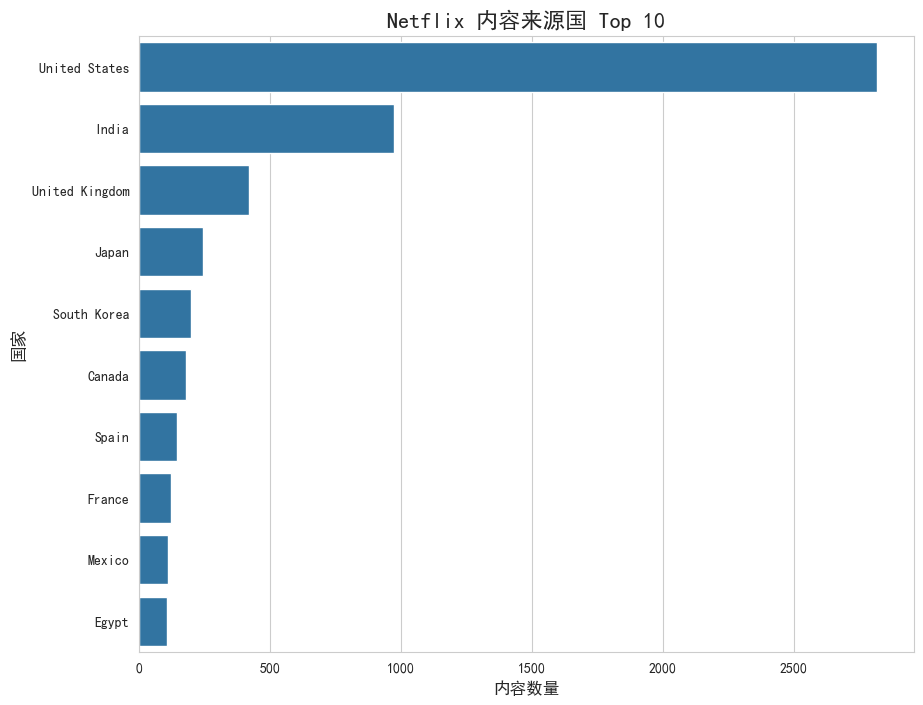

In [6]:
# 绘制条状图(barplot)

# 1. 从 country_counts 中筛选出前10名的数据
top_10_countries = country_counts.head(10)

# 2. 设置画布大小
plt.figure(figsize=(10, 8))

# 3. 绘制条形图
# y轴是国家，x轴是数量
sns.barplot(x='content_count', y='country', data=top_10_countries)

# 4. 添加标题和标签
plt.title('Netflix 内容来源国 Top 10', fontsize=16)
plt.xlabel('内容数量', fontsize=12)
plt.ylabel('国家', fontsize=12)

# 5. 显示图表
plt.show()

# 这张排行榜清晰地显示了美国“一家独大”的局面，同时也反映了印度、英国等重要市场。

In [ ]:
#####    核心洞察（有关于Netflix内容库国家来源分析）
#####    As we can see from this plot clearly,the most of the content comes from the US,it shows the powerful movie and TV 
#####    shows marker in US,and the top3 also include India and UK.
#####    由图可以显著看出，Netflix的内容库中，美国的内容一家独大，侧面反映美国的电影、电视TV行业发展迅速，娱乐市场繁荣，收观众的喜爱度和接受度较高。
#####    “美国作为核心内容产地，其数量（超过2800部）不仅遥遥领先，甚至超过了榜单上二至六名的总和，体现了平台内容的‘头部效应’。”
#####    如果在此内容数量下观影数据反响良好，可以加大美国市场电影的引入，并且在观影网页上做一组单独的栏目。。

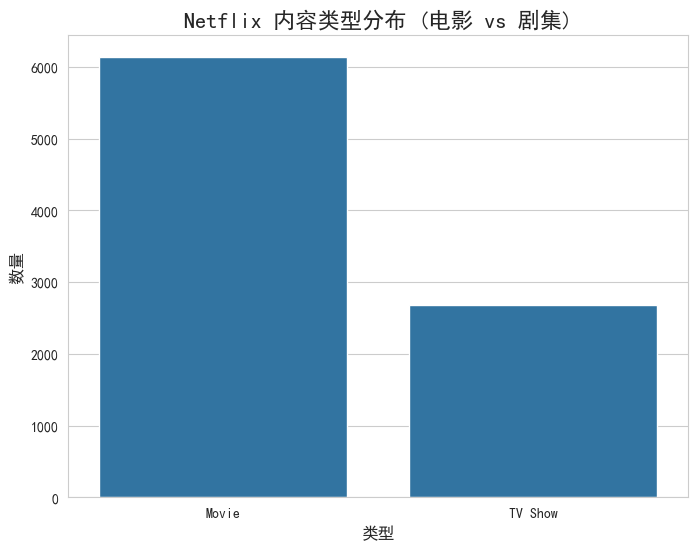

In [9]:
#计数柱状图(countplot)
#柱状图（在Seaborn中用 countplot 更方便）适合用来展示分类变量的分布。

# 1. 设置画布大小
plt.figure(figsize=(8, 6))  

# 2. 绘制计数柱状图
# 直接从原始的 df 中，按 'type' 列进行计数
sns.countplot(x='type',data=df,order= df['type'].value_counts().index)
#!!!!Data source must be a DataFrame or Mapping(图表中的数据格式一定得是DataFrame或者一个映射)
#value_counts()返回一个带标签(同时也是索引Index)的一维数组，Index为列名，计算Df中某一列不同种类的数量，值（value）为统计的数量
#value_counts()的默认排序规则：按“计数值”降序排列

#sns.countplot()只读取排序（series中的index）,然后数据自动显示，所以不需要

# 3. 添加标题和标签
plt.title('Netflix 内容类型分布 (电影 vs 剧集)', fontsize=16)
plt.xlabel('类型', fontsize=12)
plt.ylabel('数量', fontsize=12)

# 4. 显示图表
plt.show()

In [ ]:
#####   核心洞察（有关于内容库分类分析）
#####   As is shown in the plot, Movie的数量占了大多数，超过了三分之二。
#####   没有明显能从中得到的信息，
#####   “当前电影为主的内容结构，是否与我们的用户留存策略相匹配？剧集用户是否比电影用户展现出更高的粘性？这值得我们进行后续的用户行为分析。”

In [4]:
radius = 20
area = radius*radius*3.14159

print(f'The area of the circle is {area}.')

The area of the circle is 1256.636.


In [6]:
print('hello world!')
print(3+2,3-2,3*2)
print(int(8/2),8**2,2*(2+4))

hello world!
5 1 6
4 64 12
